<a href="https://colab.research.google.com/github/Shahnaz03/Machine_Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted price for 1800 sqft = 180.00 lakhs


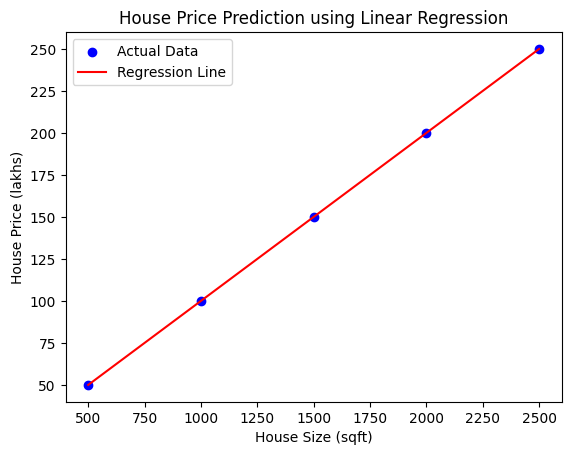

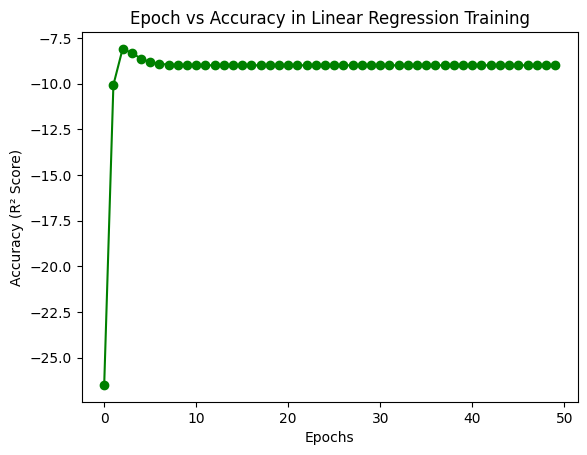

In [3]:
# ----------------------------
# Step 1: Import libraries
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ----------------------------
# Step 2: Prepare dataset (House Size vs Price)
# ----------------------------
# Example dataset: (size in sqft, price in lakhs)
X = np.array([500, 1000, 1500, 2000, 2500]).reshape(-1, 1)  # independent variable (house size)
y = np.array([50, 100, 150, 200, 250])  # dependent variable (house price)

# ----------------------------
# Step 3: Train Linear Regression model
# ----------------------------
model = LinearRegression()
model.fit(X, y)

# ----------------------------
# Step 4: Predict price for a new house
# ----------------------------
new_size = np.array([[1800]])   # predict price for 1800 sqft house
predicted_price = model.predict(new_size)
print(f"Predicted price for 1800 sqft = {predicted_price[0]:.2f} lakhs")

# ----------------------------
# Step 5: Plot Regression Line
# ----------------------------
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.xlabel("House Size (sqft)")
plt.ylabel("House Price (lakhs)")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()

# ----------------------------
# Step 6: Simulate Epoch vs Accuracy graph
# ----------------------------
# Note: sklearn LinearRegression does not train in epochs.
# We'll simulate training using Gradient Descent and calculate accuracy.

m, c = 0, 0   # initial slope and intercept
L = 0.0000001 # learning rate
epochs = 50   # number of iterations
accuracies = []

# Define accuracy function (R² score approximation)
def accuracy(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

for i in range(epochs):
    y_pred = m*X + c
    acc = accuracy(y, y_pred)
    accuracies.append(acc)

    # Gradient Descent update
    D_m = (-2/len(X)) * sum(X.flatten() * (y - y_pred.flatten()))
    D_c = (-2/len(X)) * sum(y - y_pred.flatten())
    m = m - L * D_m
    c = c - L * D_c

# ----------------------------
# Step 7: Plot Epoch vs Accuracy
# ----------------------------
plt.plot(range(epochs), accuracies, marker='o', color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (R² Score)")
plt.title("Epoch vs Accuracy in Linear Regression Training")
plt.show()